# step by step processo de MachineLearning
* padrão
- step by step
. tecnicas de agrupamento

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [65]:
# criaçao de Dataframe
clientes_df = pd.read_csv('./data-projects/Marketing.csv')

In [66]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [67]:
clientes_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [68]:
clientes_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [69]:
# criação de Dataframe com atributos e seus tipos 

info = clientes_df.nunique().sort_values()

# determinando o tipo de dado de cada uma das variáveis do dataset.

info = pd.DataFrame(info.values, index = info.index, columns = ['Uniques'])

# atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.

info['types'] = clientes_df.dtypes

# exibindo Dataframe.

info


,Uniques,types
TENURE,7,int64
BALANCE_FREQUENCY,43,float64
PURCHASES_INSTALLMENTS_FREQUENCY,47,float64
PRC_FULL_PAYMENT,47,float64
PURCHASES_FREQUENCY,47,float64
ONEOFF_PURCHASES_FREQUENCY,47,float64
CASH_ADVANCE_FREQUENCY,54,float64
CASH_ADVANCE_TRX,65,int64
PURCHASES_TRX,173,int64
CREDIT_LIMIT,205,float64


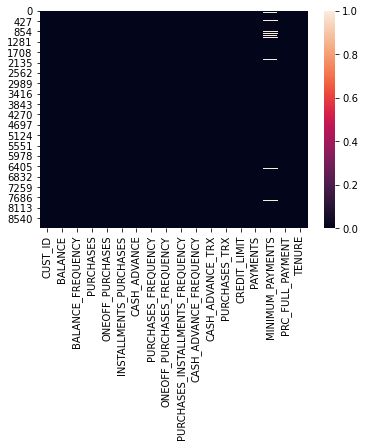

In [70]:
sns.heatmap(clientes_df.isnull());

In [71]:
valores_nulos = pd.DataFrame(clientes_df.isnull().sum())
valores_nulos.columns =  ['Qt_NaN']
valores_nulos

,Qt_NaN
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [72]:
# localizando os atributos NaN
clientes_df.loc[(clientes_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = clientes_df['MINIMUM_PAYMENTS'].mean()
clientes_df.loc[(clientes_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = clientes_df['CREDIT_LIMIT'].mean()

In [73]:
valores_nulos

,Qt_NaN
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


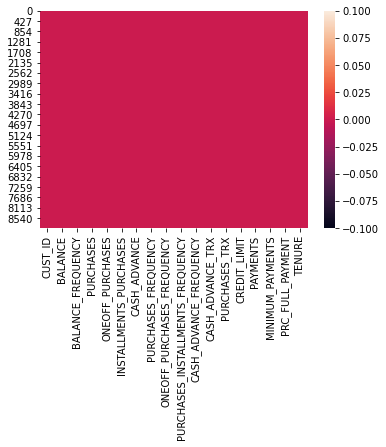

In [74]:
sns.heatmap(clientes_df.isnull());

In [75]:
# apagando a coluna do id do cliente por se irrelevante
clientes_df.drop('CUST_ID', axis=1, inplace=True)

# viz grafica

In [76]:
# coletando nome das colunas
clientes_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

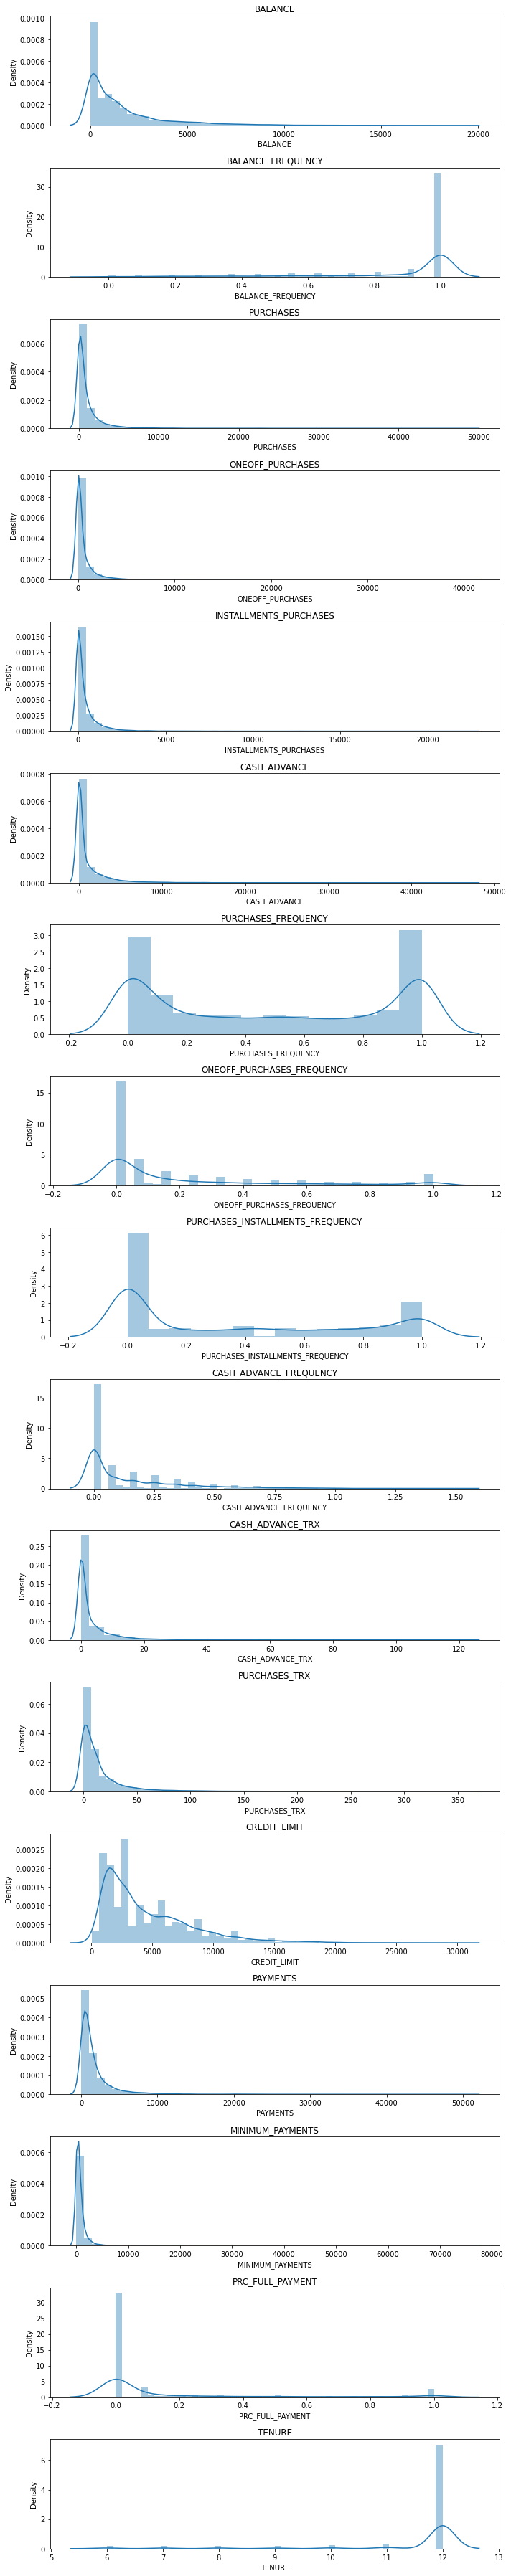

In [77]:
import warnings
warnings.filterwarnings("ignore")

# plotagem de graficos de todas as colunas
plt.figure(figsize=(10, 50))
for i in range(len(clientes_df.columns)):
    plt.subplot( 17 , 1 , i + 1 )
    sns.distplot(clientes_df[clientes_df.columns[i]], kde = True)
    plt.title(clientes_df.columns[i])
plt.tight_layout();

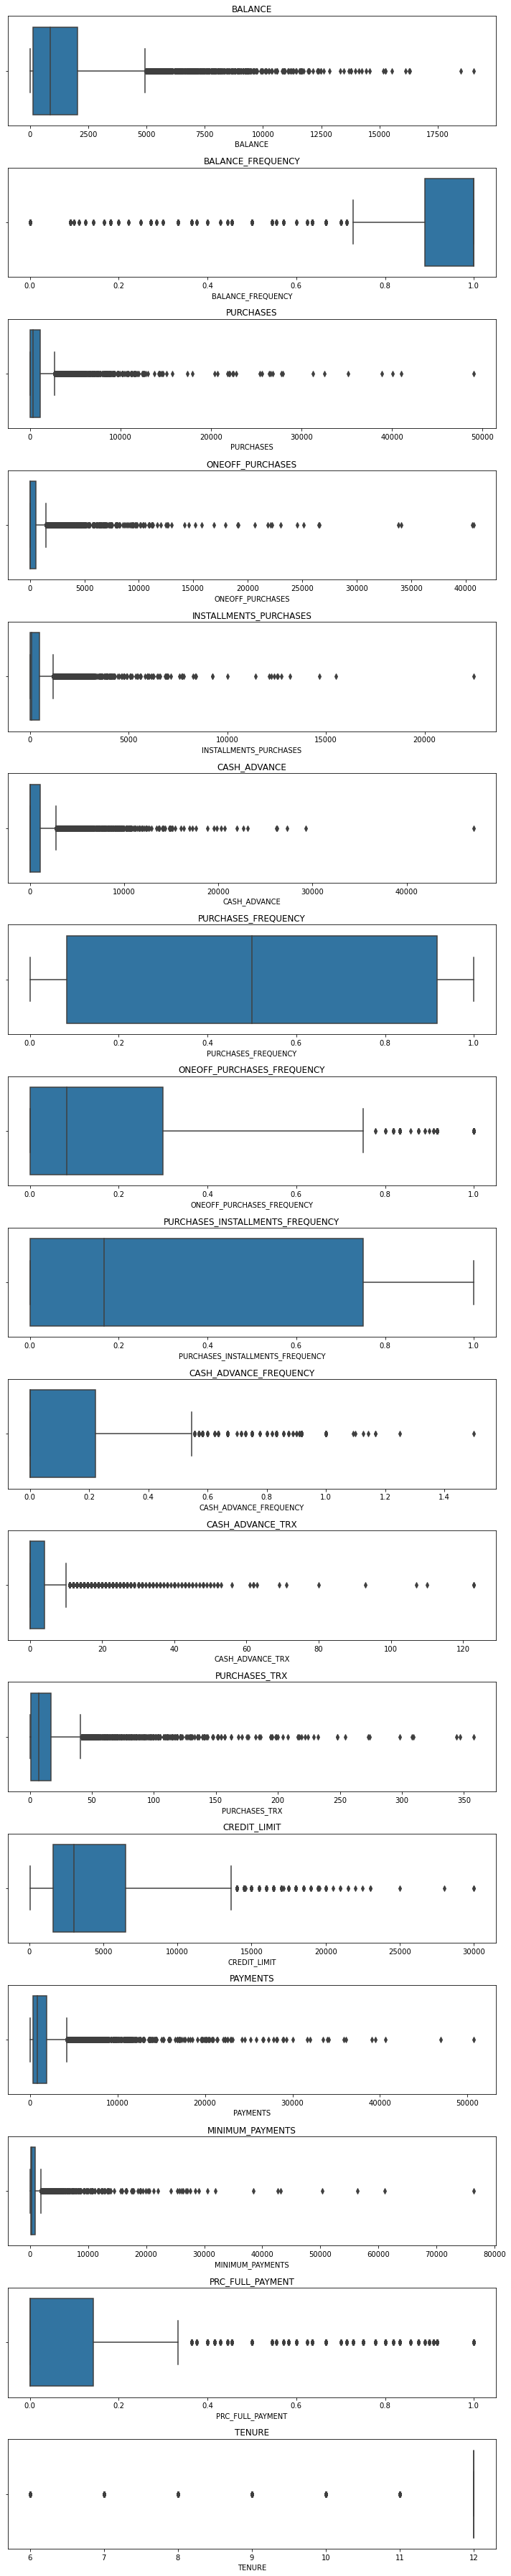

In [78]:
# plotagem de graficos de todas as colunas
plt.figure(figsize=(10, 50))
for i in range(len(clientes_df.columns)):
    plt.subplot( 17 , 1 , i + 1 )
    sns.boxplot(clientes_df[clientes_df.columns[i]],)
    plt.title(clientes_df.columns[i])
plt.tight_layout();

In [79]:
correlações = clientes_df.corr()

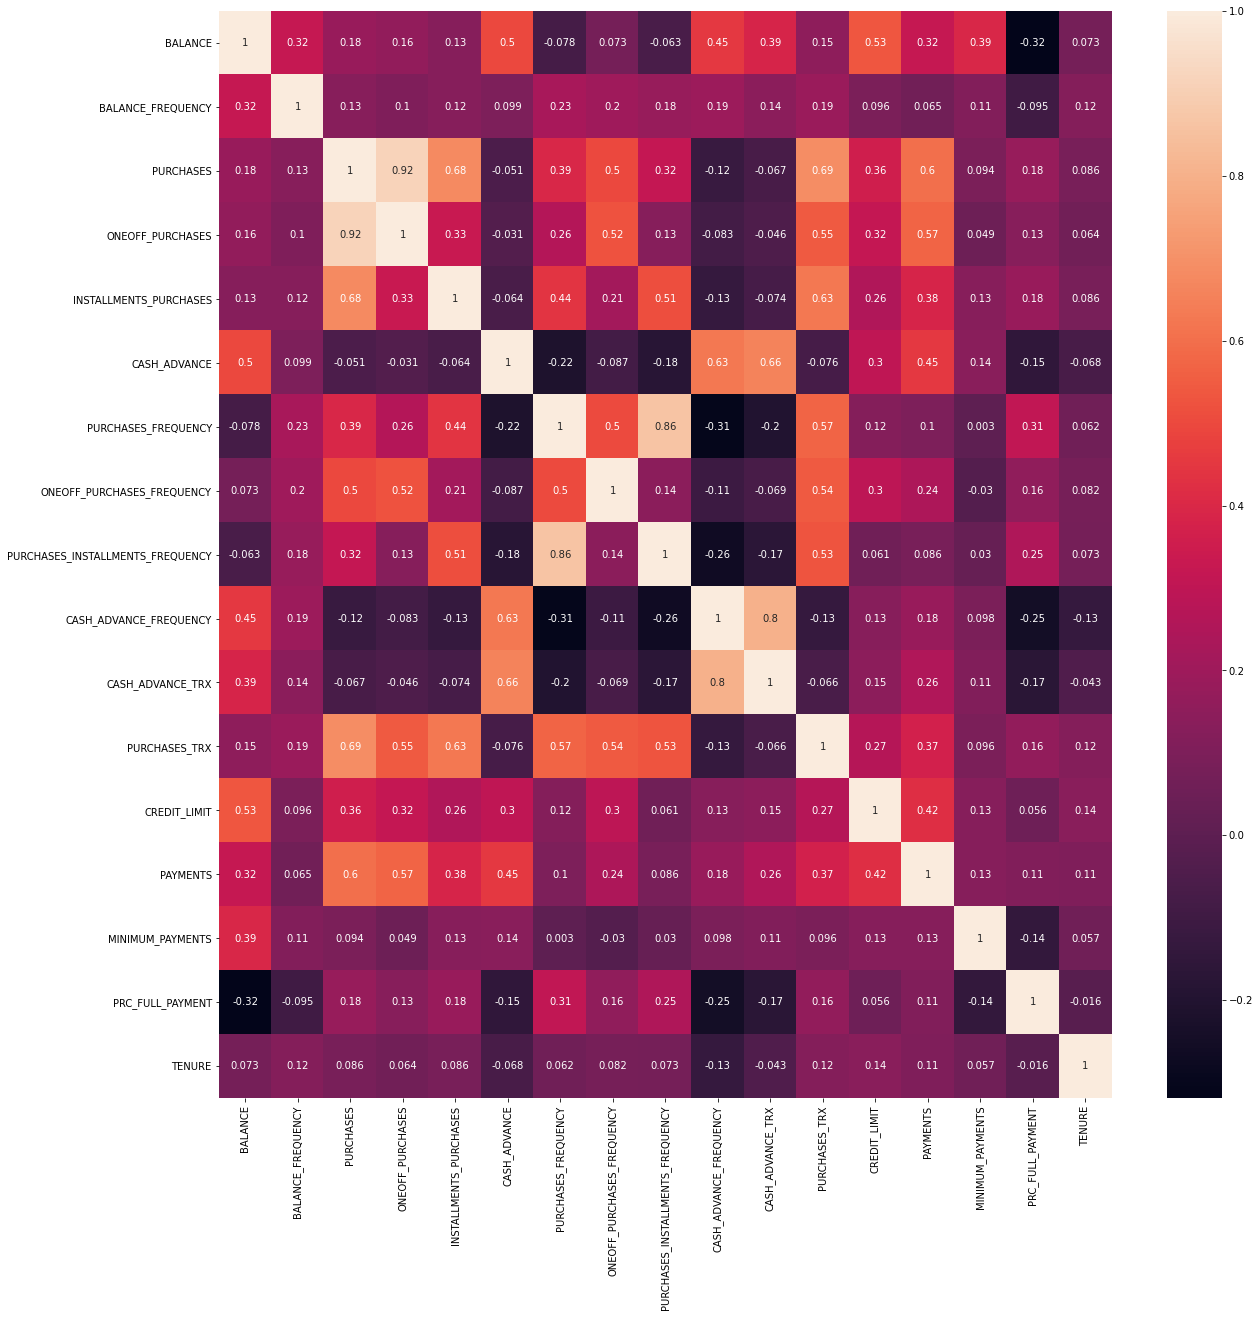

In [80]:
fig, axie = plt.subplots(figsize=(20,20))
sns.heatmap(correlações, annot=True);

In [81]:
# colocar os dados na mesma escala para não gerar ordem de importancia pelos valores
scaler = StandardScaler()
clientes_scaler = scaler.fit_transform(clientes_df)

In [82]:
type(clientes_scaler), type(clientes_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [83]:
min(clientes_scaler[0]), max(clientes_scaler[0])

(-0.9604333444542572, 0.36067954425377496)

In [84]:
# teste do cotovelo
wcss_1 =[]
range_valores = range(1, 20)
for i in range_valores:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(clientes_scaler)
    wcss_1.append(kmeans.inertia_)

In [85]:
print(wcss_1)

[152149.9999999988, 127784.80276269239, 111986.64440741223, 99073.93826774781, 91503.39081843318, 84852.45300468433, 79758.88535634425, 74494.87625883253, 69970.40321066449, 68226.23260705387, 63618.9545684077, 61388.72965845411, 59143.97229017818, 57461.97803132329, 55825.012927632284, 54573.03163535009, 53197.46157562571, 52006.56744469862, 50807.11473615109]


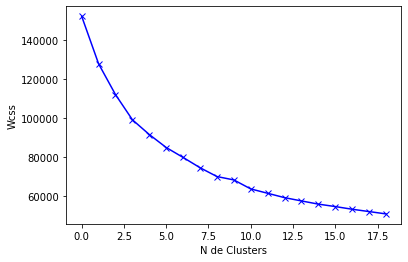

In [86]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('N de Clusters')
plt.ylabel('Wcss')
plt.show()

In [87]:
wcss_1 = pd.DataFrame(wcss_1)
wcss_1.columns = ['wcss']
wcss_1['wcss %'] = wcss_1['wcss'].pct_change()

In [88]:
wcss_1

,wcss,wcss %
0,152150.000000,NaN
1,127784.802763,-0.160139
2,111986.644407,-0.123631
3,99073.938268,-0.115306
4,91503.390818,-0.076413
5,84852.453005,-0.072685
6,79758.885356,-0.060029
7,74494.876259,-0.065999
8,69970.403211,-0.060735
9,68226.232607,-0.024927


In [89]:
# agrupamento com kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(clientes_scaler)
labels = kmeans.labels_

In [90]:
# quantidade de clientes por grupo 
grupos_clientes = np.unique(labels, return_counts=True)
grupos_clientes = pd.DataFrame(grupos_clientes)
grupos_clientes = grupos_clientes.T
grupos_clientes.columns = ['Grupos', 'Qt Clientes']
grupos_clientes

,Grupos,Qt Clientes
0,0,942
1,1,1291
2,2,1203
3,3,2925
4,4,24
5,5,2163
6,6,348
7,7,54


In [91]:
clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns= [clientes_df.columns])

In [92]:
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.575703,0.372779,-0.224637,-0.157325,-0.242184,1.960805,-0.476985,-0.203241,-0.428424,1.924532,1.866638,-0.275668,0.961604,0.752996,0.345519,-0.389785,-0.092266
1,-0.698316,-2.139812,-0.317901,-0.236622,-0.316853,-0.306783,-0.565865,-0.435073,-0.460406,-0.486259,-0.360861,-0.428097,-0.212734,-0.222360,-0.255162,0.253972,-0.156775
2,-0.113868,0.394971,0.528869,0.650536,0.055158,-0.327806,0.966598,1.843420,0.194403,-0.407014,-0.331361,0.609759,0.435310,0.133755,-0.154091,0.409159,0.208498
3,-0.013714,0.368741,-0.358865,-0.241464,-0.404817,-0.077375,-0.864766,-0.394450,-0.768105,0.142703,-0.022184,-0.487332,-0.339460,-0.266709,-0.073657,-0.454513,-0.014346
4,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
5,-0.399732,0.306384,-0.060963,-0.255846,0.325843,-0.360839,0.980189,-0.409538,1.173524,-0.461393,-0.357242,0.137353,-0.318735,-0.241787,-0.120808,0.361653,-0.027623
6,1.019301,0.463938,2.525546,1.836092,2.598460,-0.156697,1.168055,1.591195,1.273950,-0.281779,-0.148048,3.148791,1.312412,1.463421,0.367185,0.267354,0.337060
7,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491


In [93]:
clusters_centers = scaler.inverse_transform(clusters_centers)
clusters_centers = pd.DataFrame(data = clusters_centers, columns=[clientes_df.columns])
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4844.167260,0.965579,523.265478,331.309501,192.063907,5090.771536,0.298913,0.141827,0.194171,0.520263,15.987261,7.857749,7993.157692,3912.993275,1669.424555,0.039709,11.393843
1,110.989303,0.370369,324.005159,199.693532,124.541526,335.531990,0.263242,0.072667,0.181460,0.037839,0.786212,4.068939,3720.436788,1089.434001,269.563296,0.227997,11.307514
2,1327.467951,0.970836,2133.140682,1672.193957,460.946725,291.445912,0.878293,0.752386,0.441698,0.053696,0.987531,29.866168,6078.286859,2120.351890,505.105084,0.273387,11.796342
3,1535.930302,0.964622,236.483306,191.655860,44.996636,816.613165,0.143278,0.084786,0.059173,0.163700,3.097436,2.596581,3259.356125,961.048195,692.552236,0.020777,11.498120
4,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
5,732.465866,0.949850,872.957365,167.785543,705.723500,222.175760,0.883748,0.080284,0.830826,0.042815,0.810911,18.123902,3334.761158,1033.193711,582.668532,0.259492,11.480351
6,3686.064602,0.987173,6399.072701,3639.973678,2760.823161,650.269592,0.959148,0.677142,0.870738,0.078757,2.238506,92.977011,9269.540230,5969.604295,1719.914978,0.231911,11.968391
7,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407


In [98]:
# adcionar os grupos a base de dados
clientes_df_completo = pd.concat([clientes_df, pd.DataFrame({'cluster': labels})], axis = 1)
clientes_df_completo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


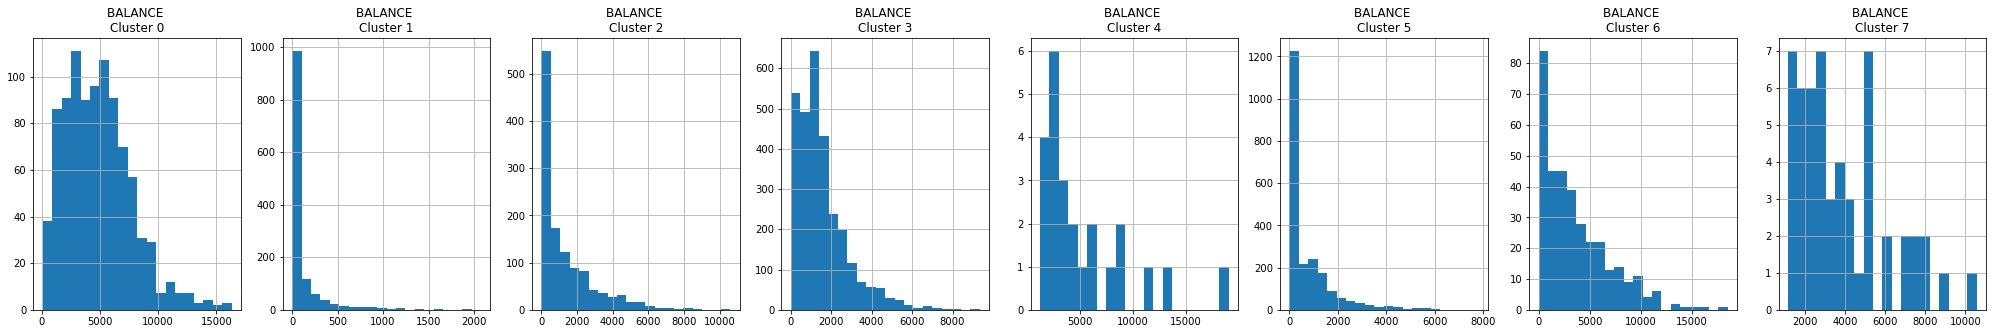

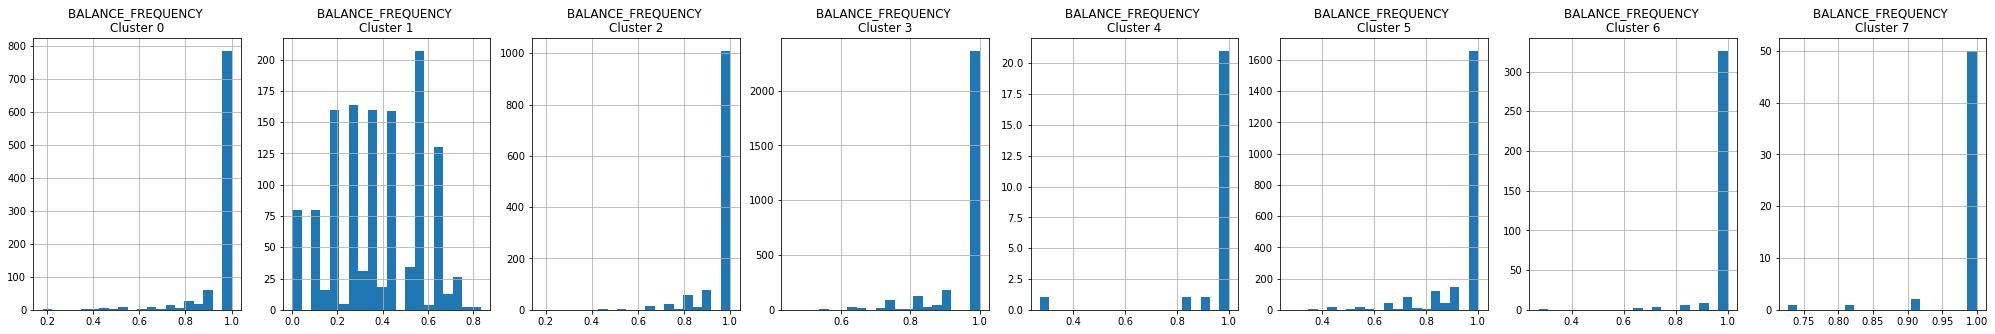

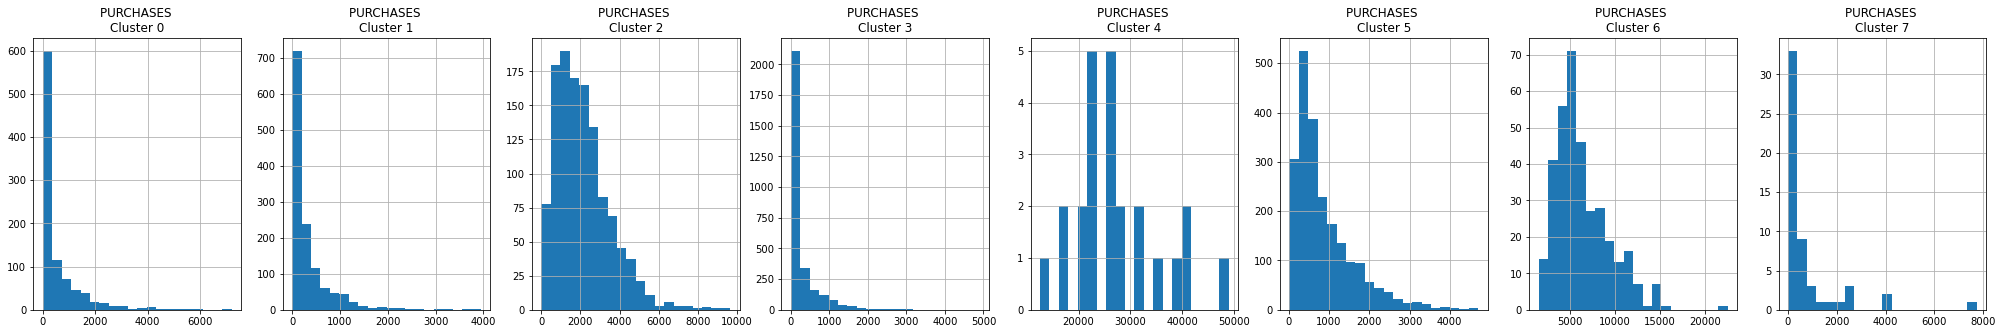

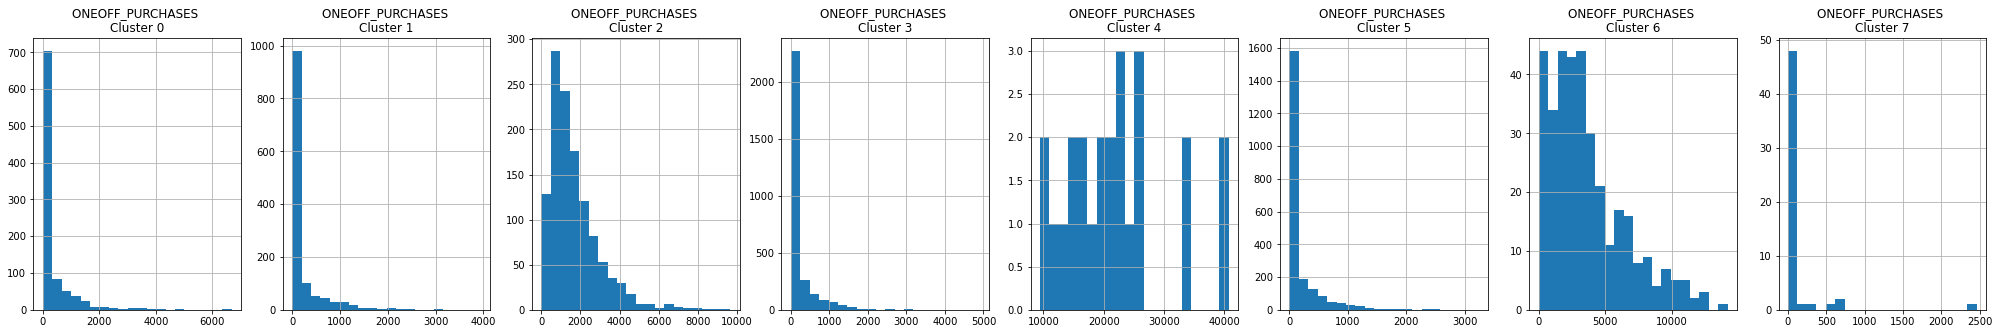

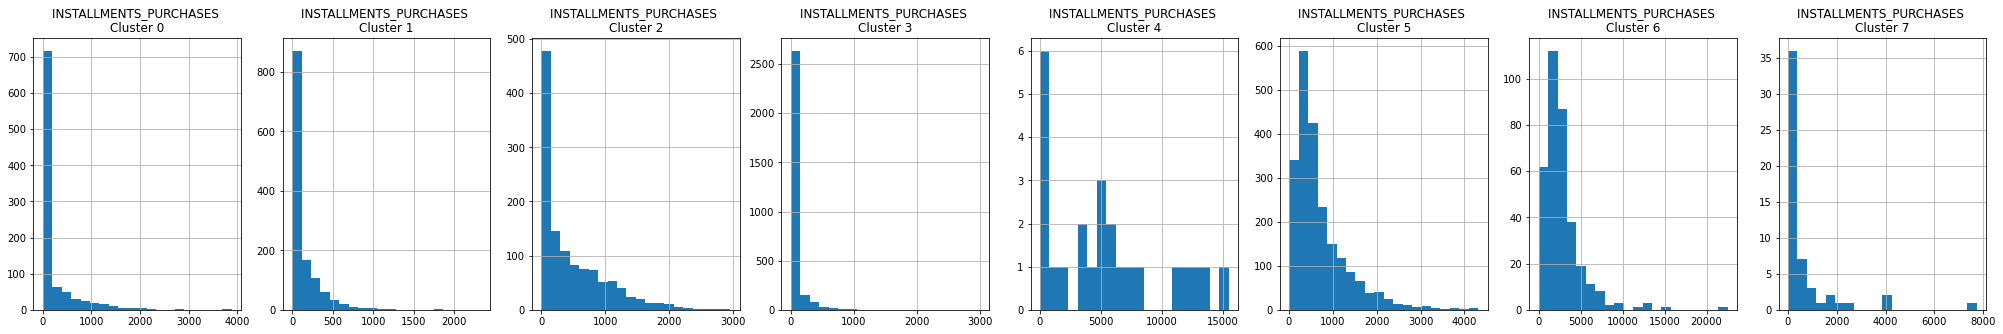

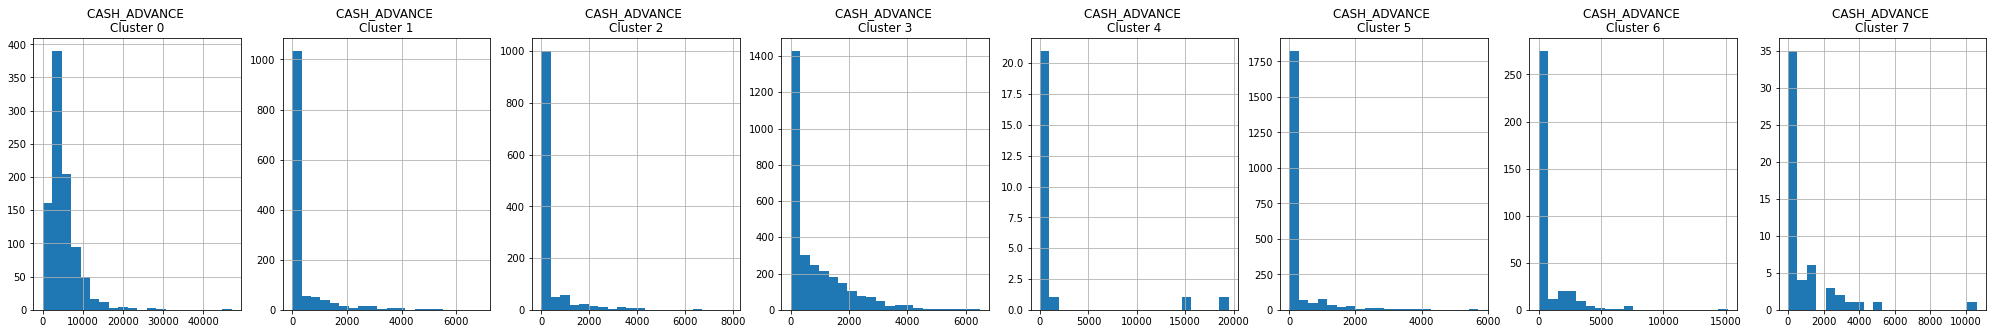

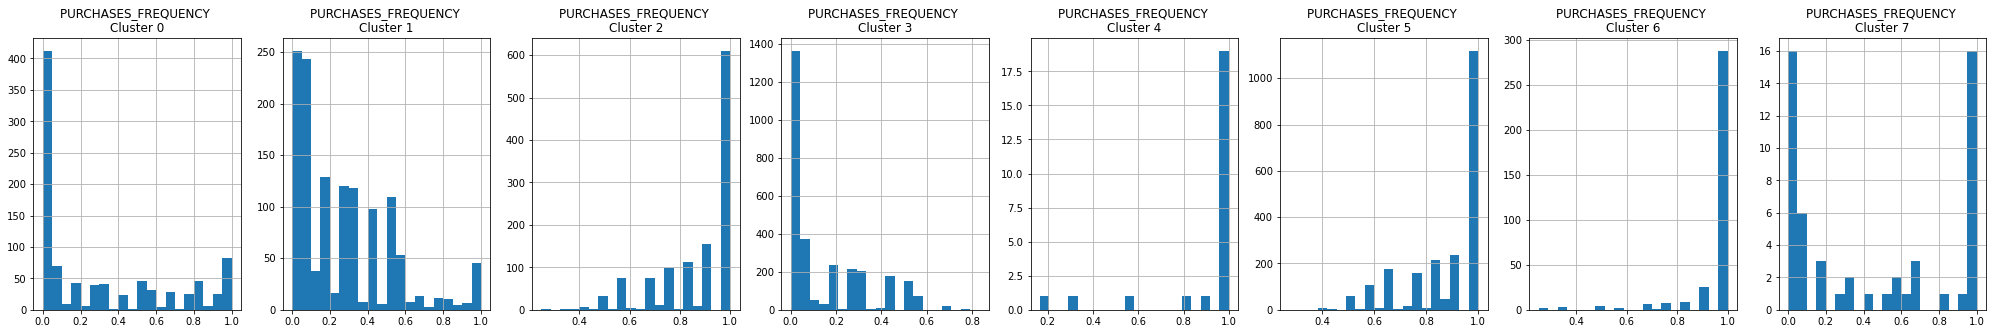

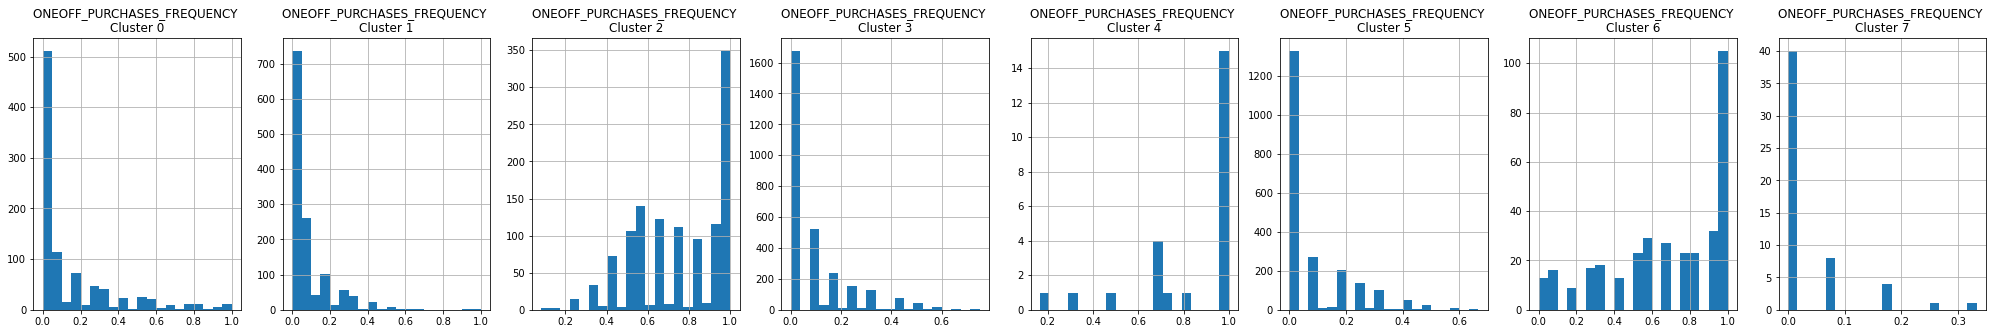

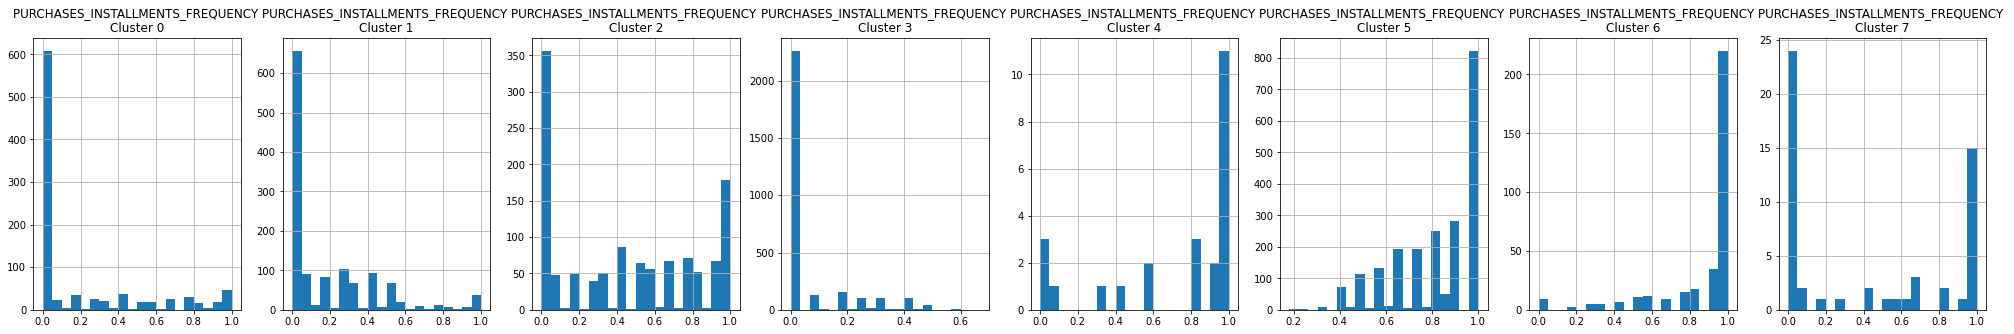

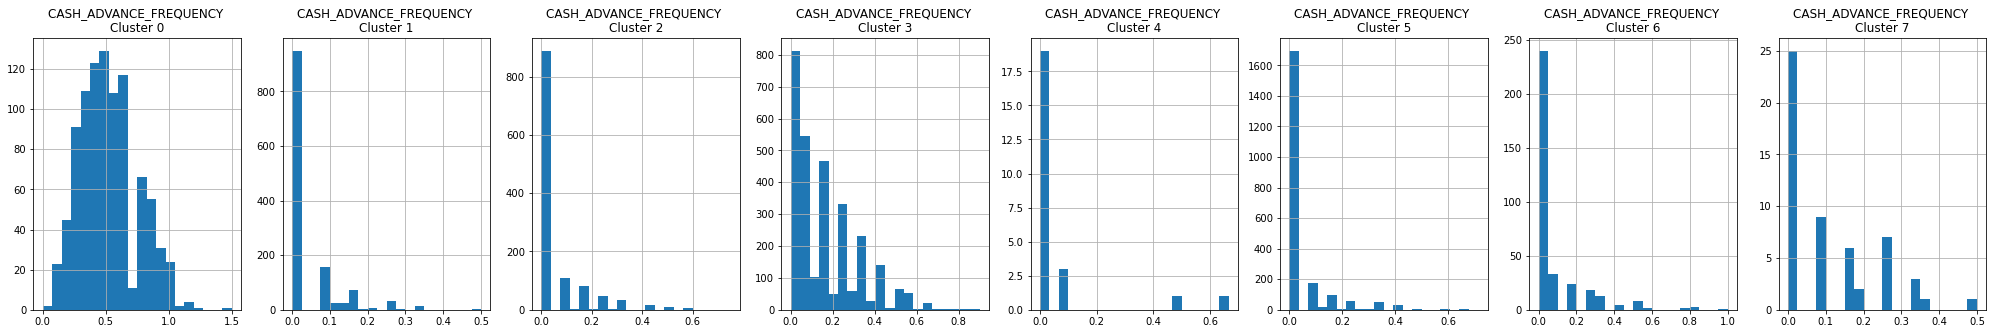

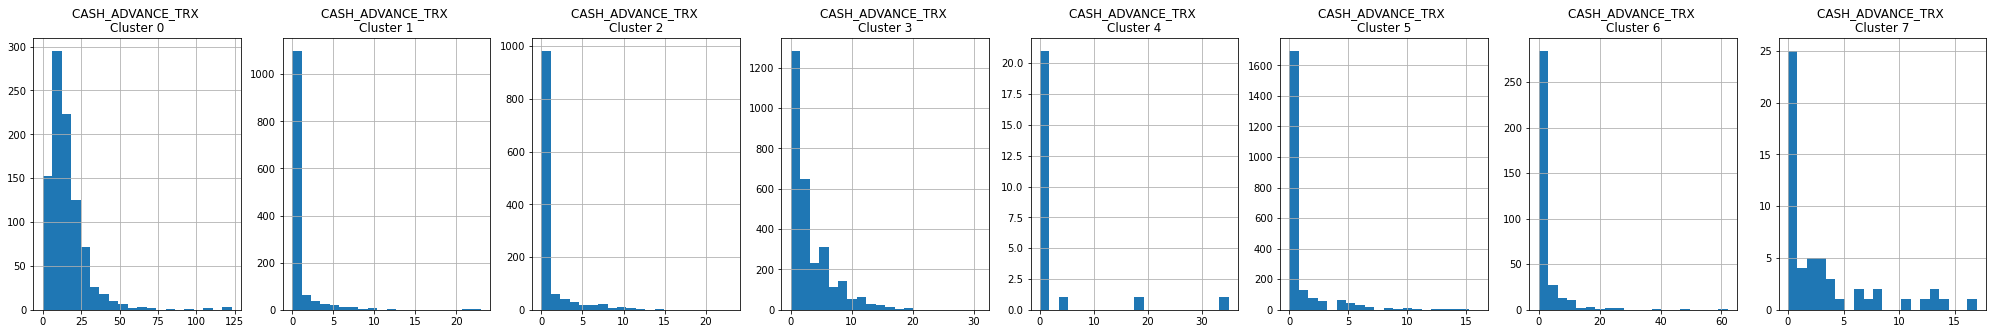

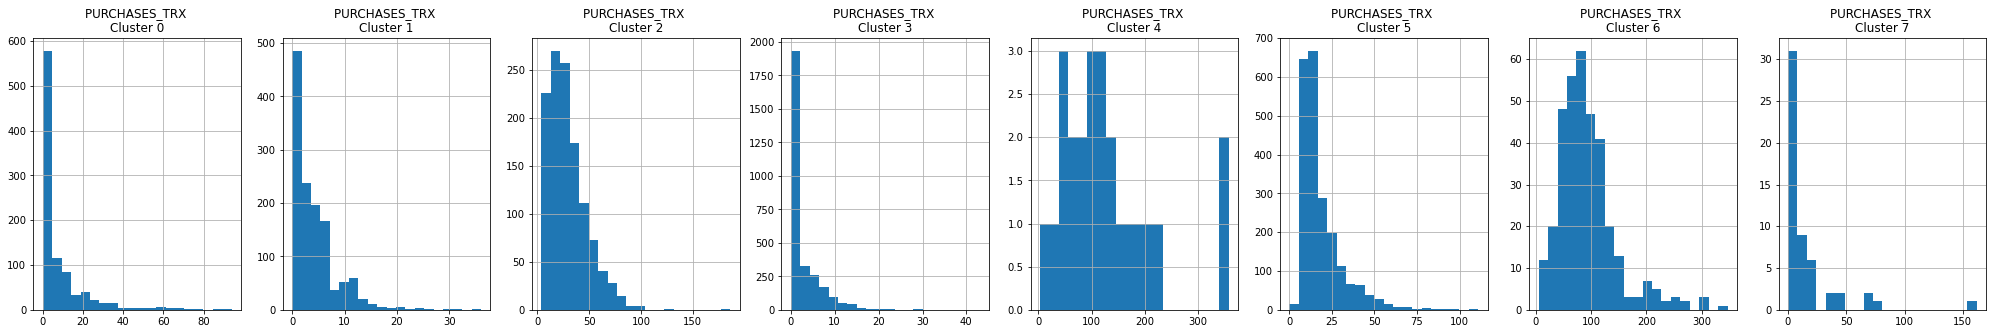

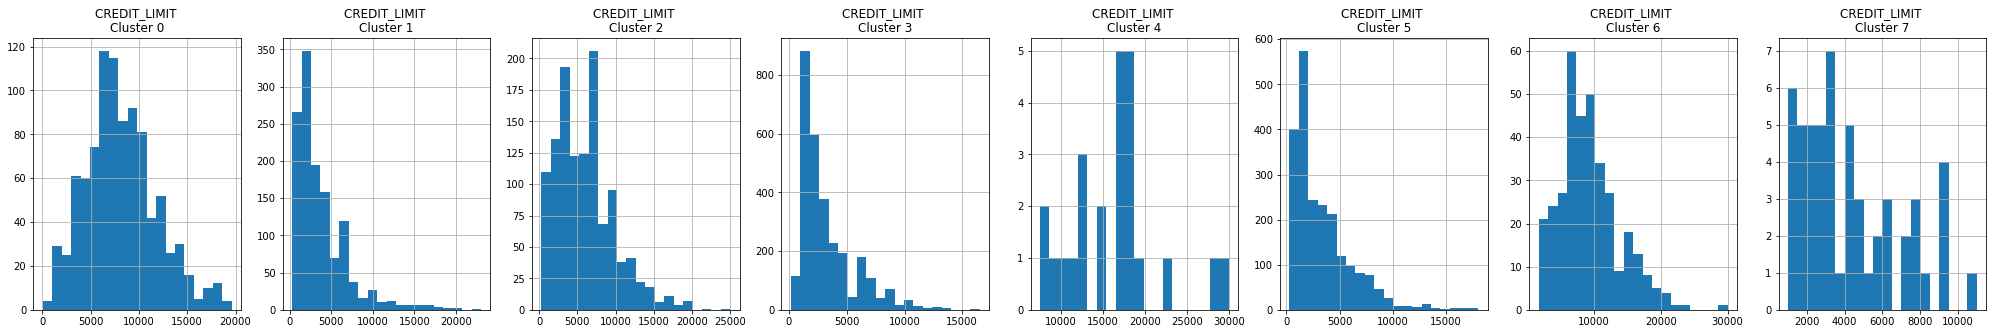

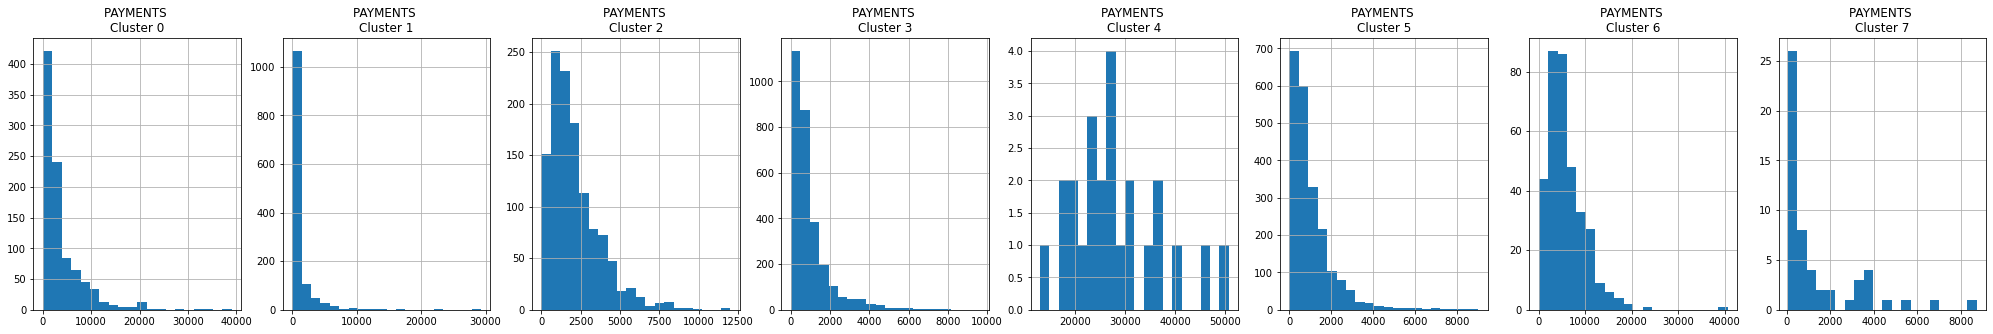

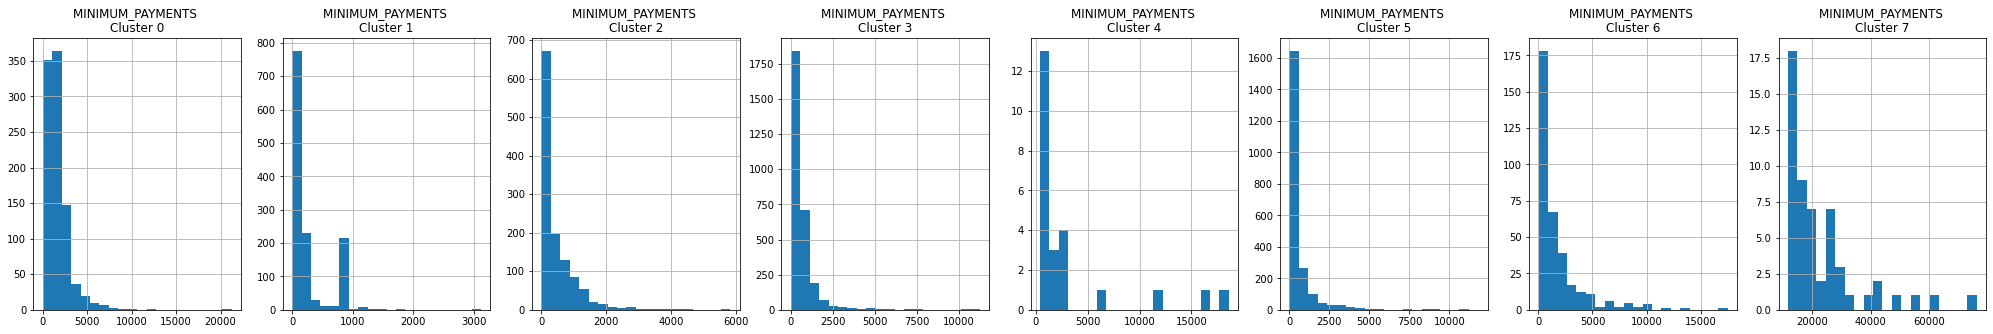

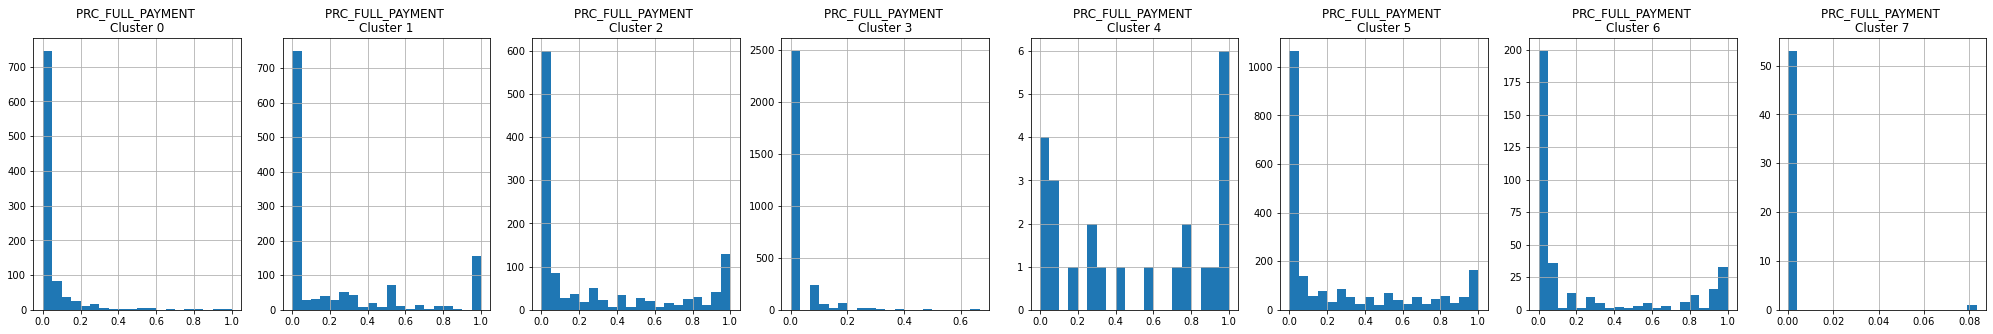

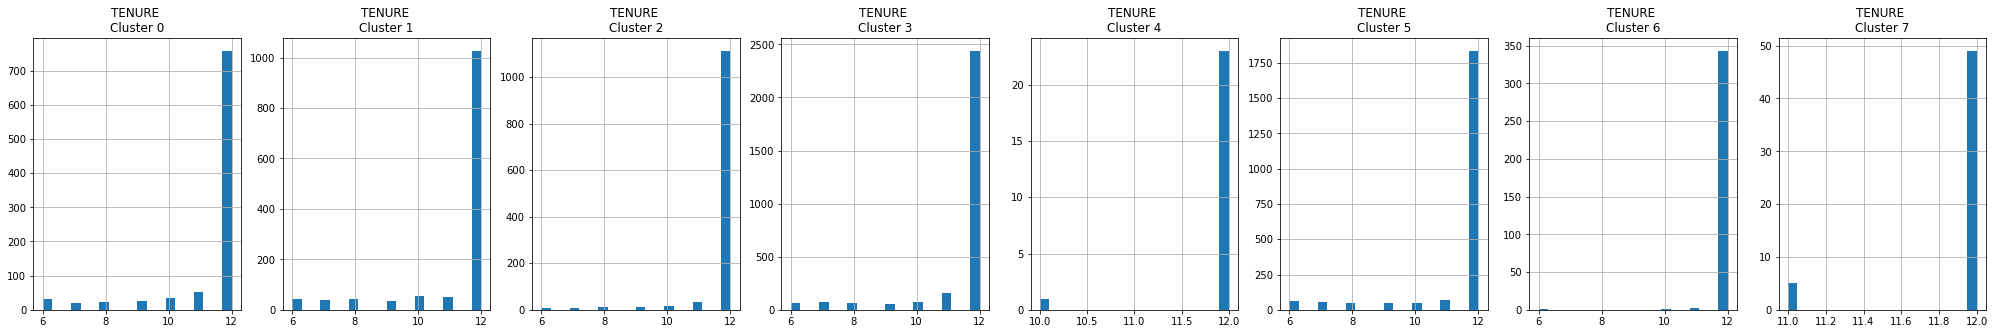

In [100]:
for i in clientes_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = clientes_df_completo[clientes_df_completo['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [101]:
# arquivo para mandar para o departamento de marketing para analise .csv
clientes_df_ordenados = clientes_df_completo.sort_values(by='cluster')
clientes_df_ordenados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4065,2361.237383,1.0,0.00,0.00,0.00,4233.413107,0.000000,0.000000,0.000000,0.416667,14,0,3000.0,3284.307320,996.558096,0.083333,12,0
3413,4146.601225,1.0,521.32,200.00,321.32,2054.006911,0.666667,0.083333,0.666667,0.416667,8,9,5000.0,1147.148308,1070.072907,0.000000,12,0
7200,1258.725885,1.0,0.00,0.00,0.00,4353.620039,0.000000,0.000000,0.000000,0.583333,21,0,3000.0,4229.128226,369.442361,0.166667,12,0
866,11654.554920,1.0,463.00,74.00,389.00,3096.807933,0.583333,0.083333,0.416667,0.416667,17,7,12500.0,3024.609470,5148.045052,0.000000,12,0
7202,3211.389574,1.0,0.00,0.00,0.00,4464.940638,0.000000,0.000000,0.000000,0.583333,45,0,6500.0,6925.733929,978.238735,0.083333,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,6090.522273,1.0,22.16,22.16,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,9000.0,568.781100,30528.432400,0.000000,12,7
2774,2748.868773,1.0,598.50,598.50,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,34,2000.0,518.300462,28483.254830,0.000000,12,7
150,7679.629040,1.0,4059.93,0.00,4059.93,555.469352,0.583333,0.000000,0.500000,0.166667,7,14,7000.0,3685.610620,12854.939700,0.000000,12,7
5657,4628.109931,1.0,912.54,0.00,912.54,0.000000,1.000000,0.000000,1.000000,0.000000,0,21,5000.0,3746.305759,56370.041170,0.000000,12,7


In [102]:
clientes_df_ordenados.to_csv('Clientes_cluster.csv')

In [103]:
# aplicação de PCA(principal component analysis)
# melhor visualização dos grupos
